----------------------------------------------
## **CRIMECAST : FORECASTING CRIME CATEGORIES**
----------------------------------------------

In [ ]:
# Import Libraries....
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import cross_validate

In [ ]:
#Loading the dataset
data= pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
X_test=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

In [ ]:
df=data.copy()

## A LOOK AT THE DATA:

In [ ]:
df.head() #First five rows

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [ ]:
df.shape

(20000, 22)

In [ ]:
df.columns

Index(['Location', 'Cross_Street', 'Latitude', 'Longitude', 'Date_Reported',
       'Date_Occurred', 'Time_Occurred', 'Area_ID', 'Area_Name',
       'Reporting_District_no', 'Part 1-2', 'Modus_Operandi', 'Victim_Age',
       'Victim_Sex', 'Victim_Descent', 'Premise_Code', 'Premise_Description',
       'Weapon_Used_Code', 'Weapon_Description', 'Status',
       'Status_Description', 'Crime_Category'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

# **EDA:**

In [ ]:
df.describe()

,Latitude,Longitude,Time_Occurred,Area_ID,Reporting_District_no,Part 1-2,Victim_Age,Premise_Code,Weapon_Used_Code
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,7335.000000
mean,33.940704,-117.893072,1352.380350,10.834250,1129.599200,1.418150,30.135000,297.176950,366.405044
std,2.126810,7.377726,646.100291,6.033166,603.330519,0.493267,21.863645,212.007298,120.485687
min,0.000000,-118.663400,1.000000,1.000000,101.000000,1.000000,-2.000000,101.000000,101.000000
25%,34.009200,-118.429700,930.000000,6.000000,632.000000,1.000000,12.000000,101.000000,312.000000
50%,34.058700,-118.323000,1430.000000,11.000000,1162.000000,1.000000,31.000000,203.000000,400.000000
75%,34.165025,-118.274400,1900.000000,16.000000,1622.000000,2.000000,46.000000,501.000000,400.000000
max,34.328100,0.000000,2359.000000,21.000000,2197.000000,2.000000,99.000000,969.000000,515.000000


In [ ]:
df.isnull().sum()

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

> Cross Street Contains around 82% null values....

> Hence, better to drop.

In [ ]:
df.drop('Cross_Street',axis=1,inplace=True)
X_test.drop('Cross_Street',axis=1,inplace=True)

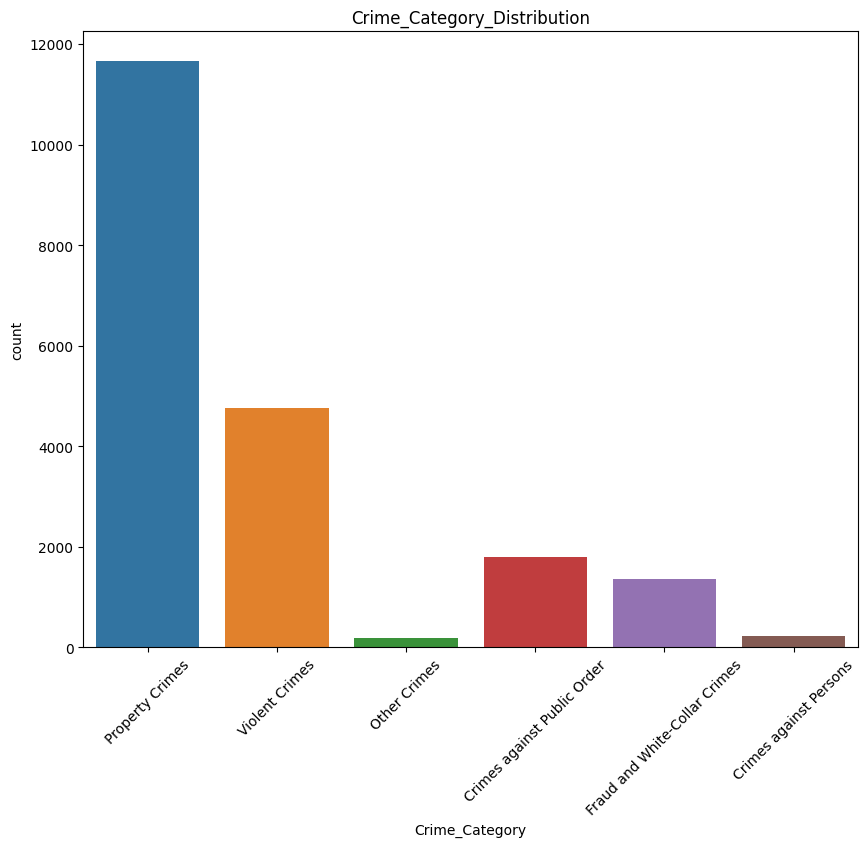

In [ ]:
# Visualizing the Crime Category Distribution
plt.figure(figsize=(10,8))
sns.countplot(df,x='Crime_Category')
plt.title('Crime_Category_Distribution')
plt.xticks(rotation=45)
plt.show()

> Data is highly Imbalanced.

> Property Crimes Having alot of rows.

> Better to use **STRATIFY** parameter.

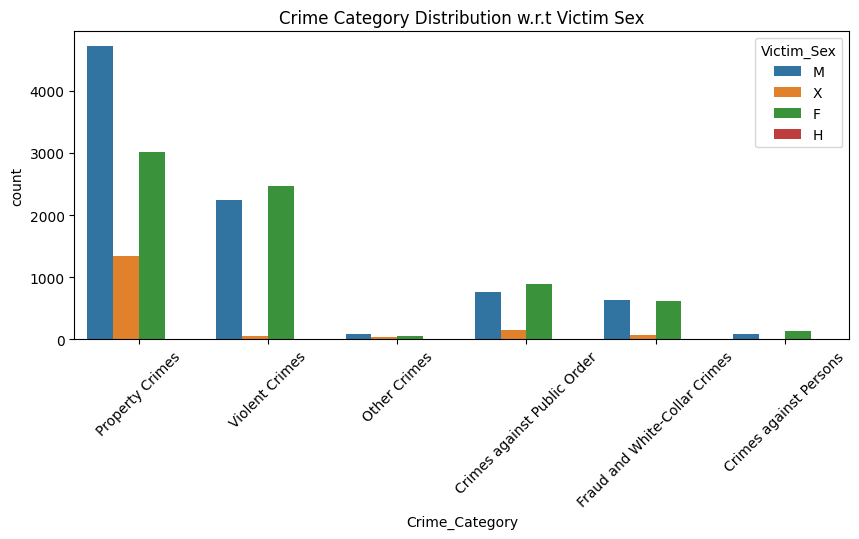

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(df,x='Crime_Category',hue='Victim_Sex')
plt.title('Crime Category Distribution w.r.t Victim Sex')
plt.xticks(rotation=45)
plt.show()

OBSERVATION:
> For Property Crimes Msaximum Victims are Males.

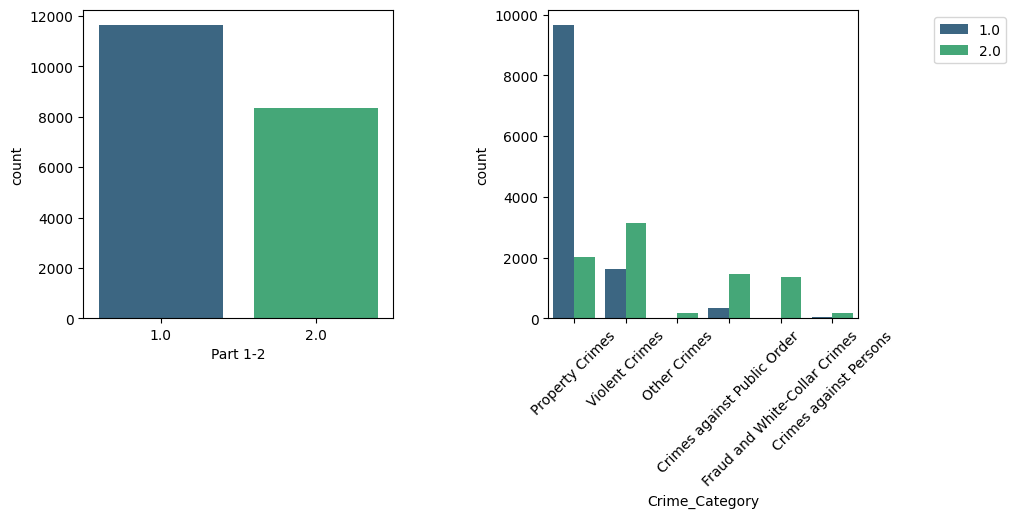

In [ ]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(df,x='Part 1-2',palette='viridis')
plt.subplot(1,2,2)
sns.countplot(df,x='Crime_Category',hue='Part 1-2',palette='viridis')
plt.xticks(rotation=45)
plt.subplots_adjust(wspace=0.5)
legend=plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))

OBSERVATIONS:
> There is a variation in Property crimes and all other.

> For property 1 is 1type of crime is the most while for others 2-type exceeds.

> ( **IMPORTANT FEATURES FOR DEPECTING CRIMES**)

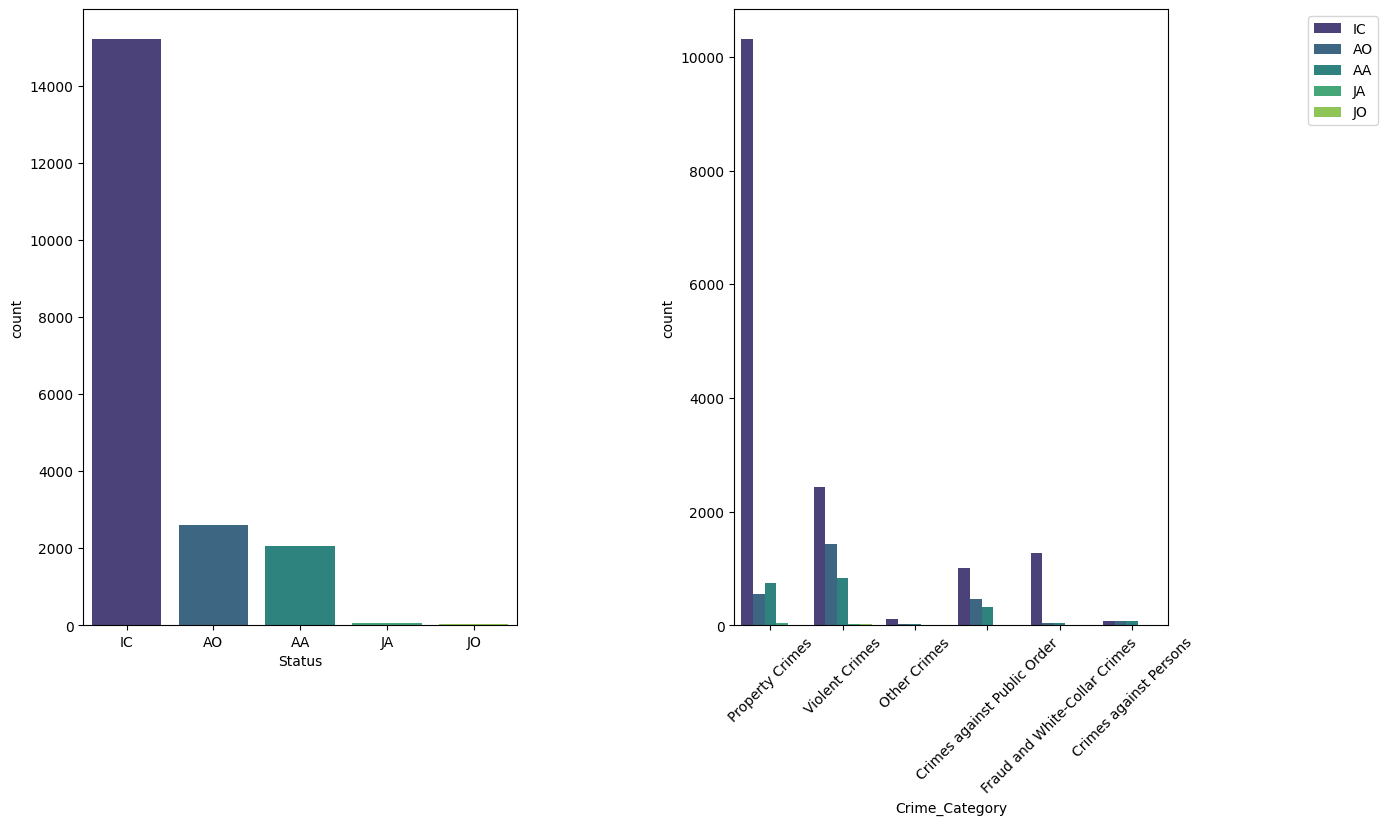

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.countplot(df,x='Status',palette='viridis')
plt.subplot(1,2,2)
sns.countplot(df,x='Crime_Category',hue='Status',palette='viridis')
plt.xticks(rotation=45)
plt.subplots_adjust(wspace=0.5)
legend=plt.legend(loc='upper right',bbox_to_anchor=(1.5,1))

OBSERVATION:
> Alot of IC type Status can be seen in the data.

## DATA PREPROCESSING:
> HANDLING DATE TIME COLUMNS:

In [ ]:
date_format = '%m/%d/%Y %I:%M:%S %p'  # Month/Day/Year Hour:Minute:Second AM/PM

# train.csv
# convert date columns to datetime with specified format
df['Date_Reported'] = pd.to_datetime(df['Date_Reported'], format=date_format)

# extract year, month, day, and hour
df['Year_Reported'] = df['Date_Reported'].dt.year
df['Month_Reported'] = df['Date_Reported'].dt.month
df['Day_Reported'] = df['Date_Reported'].dt.day

In [ ]:
# Doint the Manipulation with test dataset also...
X_test['Date_Reported'] = pd.to_datetime(X_test['Date_Reported'], format=date_format)
X_test['Day_Reported'] = X_test['Date_Reported'].dt.day

In [ ]:
# Assuming 'Time_Occurred' contains time in the format '1800' (representing 18:00), but might have decimals

# Convert 'Time_Occurred' to strings and remove decimal parts if present
df['Time_Occurred'] = df['Time_Occurred'].astype(str).str.split('.').str[0]

# Pad single-digit hours with a leading zero
df['Time_Occurred'] = df['Time_Occurred'].str.zfill(4) # Pad with zeros to ensure 4 digits

# Convert 'Time_Occurred' to datetime objects
df['Time_Occurred'] = pd.to_datetime(df['Time_Occurred'], format='%H%M').dt.time

# Extract hour from 'Time_Occurred'
df['Hour_Occurred'] = df['Time_Occurred'].apply(lambda x: x.hour)
#---------------------------------------------------------------------------------------------#
X_test['Time_Occurred'] = X_test['Time_Occurred'].astype(str).str.split('.').str[0]

# Pad single-digit hours with a leading zero
X_test['Time_Occurred'] = X_test['Time_Occurred'].str.zfill(4) # Pad with zeros to ensure 4 digits

# Convert 'Time_Occurred' to datetime objects
X_test['Time_Occurred'] = pd.to_datetime(X_test['Time_Occurred'], format='%H%M').dt.time

# Extract hour from 'Time_Occurred'
X_test['Hour_Occurred'] = X_test['Time_Occurred'].apply(lambda x: x.hour)

> VISUALIZING MONTH,  DATE, YEAR WISE DISTRIBUTION:

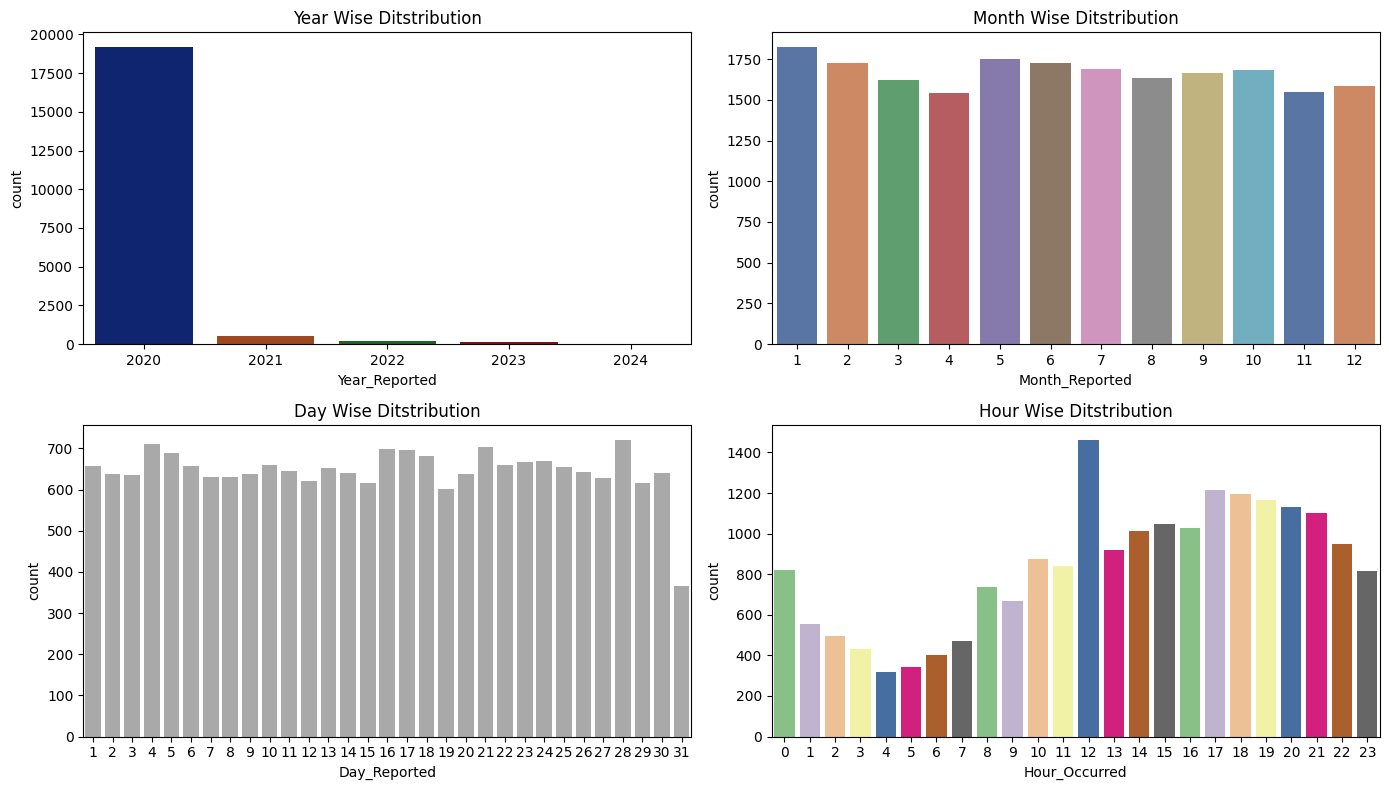

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
sns.countplot(x='Year_Reported',data=df,palette='dark')
plt.title('Year Wise Ditstribution')
plt.subplot(2,2,2)
sns.countplot(x='Month_Reported',data=df,palette='deep')
plt.title('Month Wise Ditstribution')
plt.subplot(2,2,3)
sns.countplot(x='Day_Reported',data=df,color='darkgray')
plt.title('Day Wise Ditstribution')
plt.subplot(2,2,4)
sns.countplot(x='Hour_Occurred',data=df,palette='Accent')
plt.title('Hour Wise Ditstribution')
plt.tight_layout()
plt.show()

>

> For month wise Distributon there is not much variation present.

> variance is less in the Year_Reported columns as it contains moere entries for one year.

In [ ]:
# Storing the numerical and categorical columns
x_cat=df.select_dtypes(include='object')
x_num=df.select_dtypes(exclude='object')

## CORREALATION MATRIX:

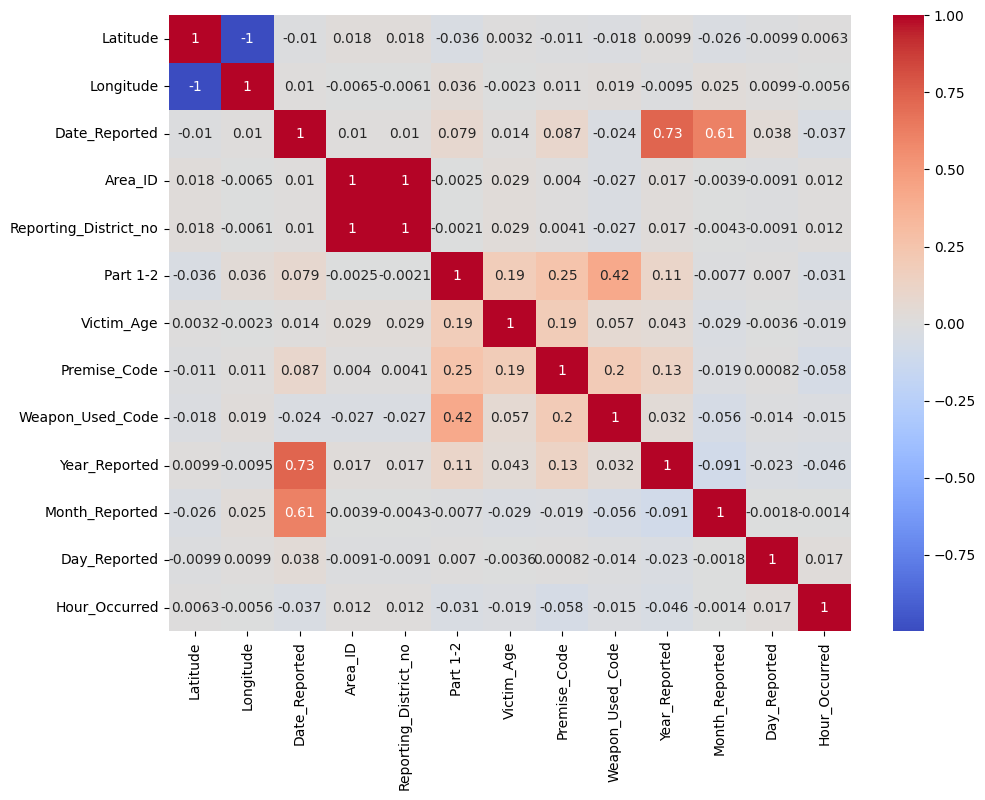

In [ ]:
#-----------------------------------------------------------------#
#------------------------- HEATMAP -------------------------------#
#-----------------------------------------------------------------#
plt.figure(figsize=(11,8))
sns.heatmap(x_num.corr(),annot=True,cmap='coolwarm')
plt.show()

## OBSERVATIONS:
> LATITUDE AND LONGITUDE ARE IN STRONGLY CORRELATED(INVERSE RELATION).

>  DATE REPORTED IS CORRELATED TO YEAR REPORTED AND MONTH REPORTED.

>  AREA ID IS FULLY CORRELATED TO REPORTING DISTRICT NUMBER.


-----------------------------------------------------------------------
-----------------------------------------------------------------------

## CRAMER'S V :

<p>Cramér's V is a measure of association between two categorical variables. It is based on the chi-squared statistic and provides a value between 0 and 1, where:</p>

<ul>
  <li><strong>0</strong> indicates no association between the variables.</li>
  <li><strong>1</strong> indicates a perfect association.</li>
</ul>

<p>It is particularly useful when you want to understand the strength of association between two categorical variables in a contingency table, such as in cross-tabulation analysis.</p>

<h3>Formula:</h3>
<p>The formula for Cramér's V is:</p>

<p style="text-align: center;">
  <img src="https://latex.codecogs.com/svg.latex?V=\sqrt{\frac{\chi^2}{n\cdot(k-1)}}" alt="Cramér's V formula" />
</p>

<ul>
  <li><strong>&chi;<sup>2</sup></strong> is the chi-squared statistic.</li>
  <li><strong>n</strong> is the total number of observations.</li>
  <li><strong>k</strong> is the number of categories in the variable with the fewest categories.</li>
</ul>

<p>Cramér's V corrects the chi-squared statistic for the size of the contingency table, making it easier to interpret.</p>


In [ ]:
# Calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

columns=list(df.columns)
for i in x_cat:
    v = cramers_v(df[i], df['Crime_Category'])
    print(f'{i} : {v}' )

Location : 0.8140625124949528
Date_Occurred : 0.14398191638861824
Time_Occurred : 0.27045488227731423
Area_Name : 0.07843402734860339
Modus_Operandi : 0.9407535555840353
Victim_Sex : 0.14442774000517344
Victim_Descent : 0.1478953356083838
Premise_Description : 0.2702501726587827
Weapon_Description : 0.3940494234245618
Status : 0.2155099050917148
Status_Description : 0.2155099050917148
Crime_Category : 1.0


> WE WILL CHOOSE COLUMNS BY TAKING CARE OF TWO THING:

> COLUMNS SHOULD BE IMPORTANT TO THE CRIME_CATEGORY FEATURE.

> NO TWO COLUMNS HAVING CORRELATION SHOULD BE CHOSEN.

## Selecting the MOST IMPORTANT Features:

In [ ]:
# Selecting the Most important features...
x_train=df[['Modus_Operandi','Location','Part 1-2','Longitude','Weapon_Used_Code','Victim_Age','Crime_Category','Premise_Code','Day_Reported','Hour_Occurred']]
X_test=X_test[['Modus_Operandi','Location','Part 1-2','Longitude','Weapon_Used_Code','Victim_Age','Premise_Code','Day_Reported','Hour_Occurred']]

## FILLING NULL VALUES:

In [ ]:
# FILLING NULL VALUES WITH MOST_FREQUENT STRATEGY....
si=SimpleImputer(strategy='most_frequent')
x_train.loc[:, 'Victim_Age'] = x_train['Victim_Age'].replace([-2, -1], np.nan)
X_test.loc[:, 'Victim_Age'] = X_test['Victim_Age'].replace([-2, -1], np.nan)
#-------------------------------------------------------------------------------#
x_train.loc[:, 'Modus_Operandi'] = si.fit_transform(x_train[['Modus_Operandi']])
X_test.loc[:, 'Modus_Operandi'] = si.transform(X_test[['Modus_Operandi']])
#-----------------------------------------------------------------------------------#
# SIMILARLY, WITH X_TEST DATA
x_train.loc[:, 'Weapon_Used_Code'] = si.fit_transform(x_train[['Weapon_Used_Code']])
X_test.loc[:, 'Weapon_Used_Code'] = si.transform(X_test[['Weapon_Used_Code']])
#-------------------------------------------------------------------------------------#
x_train.loc[:, 'Victim_Age'] = si.fit_transform(x_train[['Victim_Age']])
X_test.loc[:, 'Victim_Age'] = si.transform(X_test[['Victim_Age']])
#-----------------------------------------------------------------------------------------#

## ENCODING AND SCALING:

In [ ]:
# Initialize CountVectorizer
vectorizer_mo = CountVectorizer()
vectorizer_loc = CountVectorizer()

# Fit and transform 'Modus_Opearandi'
modus_operandi_matrix = vectorizer_mo.fit_transform(x_train['Modus_Operandi'])
modus_operandi_df = pd.DataFrame(modus_operandi_matrix.toarray(),
                                 columns=[f'MO_{word}' for word in vectorizer_mo.get_feature_names_out()])
#-------------------------------------------------------------------------------------------#
# Transform the test dataset
#-------------------------------------------------------------------------------------------#
modus_operandi_matrix1 = vectorizer_mo.transform(X_test['Modus_Operandi'])
modus_operandi_df1 = pd.DataFrame(modus_operandi_matrix1.toarray(),
                                 columns=[f'MO_{word}' for word in vectorizer_mo.get_feature_names_out()])

# Fit and transform 'Location'
location_matrix = vectorizer_loc.fit_transform(x_train['Location'])
location_df = pd.DataFrame(location_matrix.toarray(),
                           columns=[f'Loc_{word}' for word in vectorizer_loc.get_feature_names_out()])
#---------------------------------------------------------------------------------------------#
# Transform the test dataset
#---------------------------------------------------------------------------------------------#
location_matrix1 = vectorizer_loc.transform(X_test['Location'])
location_df1 = pd.DataFrame(location_matrix1.toarray(),
                           columns=[f'Loc_{word}' for word in vectorizer_loc.get_feature_names_out()])

# Drop the original columns from x_train
x_train = x_train.drop(columns=['Modus_Operandi', 'Location'])
X_test = X_test.drop(columns=['Modus_Operandi', 'Location'])

# Concatenate the new features back to x_train,x_test
x_train = pd.concat([x_train, modus_operandi_df, location_df], axis=1)
X_test = pd.concat([X_test, modus_operandi_df1, location_df1], axis=1)

# x_train now has the new features from CountVectorizer

In [ ]:
#--------------------------#
#Dividing the Dataset
#-------------------------#
y=x_train['Crime_Category']
x_train.drop('Crime_Category',axis=1,inplace=True)

In [ ]:
# Column Transformer for scaling and encoding the features
pre_proc = [
    ('num', StandardScaler(), ['Victim_Age','Premise_Code']),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), ['Weapon_Used_Code','Victim_Sex']),
    ('ord',OrdinalEncoder(),['Hour_Occurred','Day_Reported'])
]

# Create the ColumnTransformer with pandas output
pp = ColumnTransformer(
    transformers=pre_proc,
    remainder='passthrough',  # Keep other columns unchanged
    verbose_feature_names_out=False  # Use original feature names
).set_output(transform='pandas')

# Apply the transformations
transformed = pp.fit_transform(x_train)
transformed1=pp.transform(X_test)

# Drop the original columns that have been transformed
x_train = x_train.drop(columns=['Victim_Age', 'Weapon_Used_Code','Day_Reported','Hour_Occurred','Premise_Code'])
X_test = X_test.drop(columns=['Victim_Age', 'Weapon_Used_Code','Day_Reported','Hour_Occurred','Premise_Code'])
# Concatenate the transformed features with the remaining columns
x_train = pd.concat([x_train.reset_index(drop=True), transformed.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), transformed1.reset_index(drop=True)], axis=1)


In [ ]:
le=LabelEncoder()

In [ ]:
#----------------------------------------#
# We will encode the tartet feature
#----------------------------------------#
y_train = pd.DataFrame(le.fit_transform(y))

## SPLITTING THE DATA:

In [ ]:
#--------------------------------------------#
# Train Validation split with 80:20 ratio
#---------------------------------------------#
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42,stratify=y_train)

In [ ]:
X_train.isnull().sum()

Part 1-2      0
Longitude     0
MO_0100       0
MO_0104       0
MO_0105       0
             ..
Loc_zelzah    0
Loc_zeus      0
Loc_zonal     0
Loc_zoo       0
Loc_zuniga    0
Length: 7147, dtype: int64

In [ ]:
X_train.shape, X_test.shape

((16000, 7147), (5000, 7147))

# MODEL TRAINING:

> Let's first see the performance on Decision Tree Classifier.

## DECISION TREE CLASSIFIER:

In [ ]:
dtc=DecisionTreeClassifier(random_state=1234)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [ ]:
y_pred2=dtc.predict(X_val)
dtc.score(X_val,y_val)

0.93075

In [ ]:
dtc_accuracy = accuracy_score(y_val, y_pred2)
print(f"Decision Tree Validation Accuracy: {dtc_accuracy}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_val, y_pred2))

Decision Tree Validation Accuracy: 0.93075

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.44      0.51        45
           1       0.78      0.80      0.79       362
           2       0.90      0.90      0.90       271
           3       0.33      0.33      0.33        36
           4       0.98      0.98      0.98      2333
           5       0.91      0.91      0.91       953

    accuracy                           0.93      4000
   macro avg       0.75      0.73      0.74      4000
weighted avg       0.93      0.93      0.93      4000



> Nice numbers, but most probably random forest would give us something better.

> So, let's try

## RANDOM FOREST CLASSIFIER:

In [ ]:
rfc=RandomForestClassifier(random_state=1234)
rfc.fit(X_train, y_train)

/tmp/ipykernel_33/1228002531.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
# Now try predicting again
y_pred1 = rfc.predict(X_val)
rfc.score(X_val,y_val)

0.9505

In [ ]:
rfc_accuracy = accuracy_score(y_val, y_pred1)
print(f"Random Forest Validation Accuracy: {rfc_accuracy}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_val, y_pred1))

Random Forest Validation Accuracy: 0.9505

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.27      0.41        45
           1       0.86      0.82      0.84       362
           2       0.94      0.95      0.94       271
           3       0.80      0.11      0.20        36
           4       0.99      0.99      0.99      2333
           5       0.90      0.97      0.93       953

    accuracy                           0.95      4000
   macro avg       0.89      0.68      0.72      4000
weighted avg       0.95      0.95      0.95      4000



> Yeah...!! It's worked well...

> Let's try with logistic regression also.

## LOGISTIC REGRESSION:

In [ ]:
lr=LogisticRegression(random_state=1234,max_iter=1000)
lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=1234)

In [ ]:
y_pred3=lr.predict(X_val)
lr.score(X_val,y_val)

0.945

In [ ]:
lr_accuracy = accuracy_score(y_val, y_pred3)
print(f"Logistic Regression Validation Accuracy: {lr_accuracy}")
print("\nRegression Tree Classification Report:")
print(classification_report(y_val, y_pred3))

Logistic Regression Validation Accuracy: 0.945

Regression Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.53      0.61        45
           1       0.81      0.84      0.82       362
           2       0.93      0.95      0.94       271
           3       0.43      0.17      0.24        36
           4       0.98      0.98      0.98      2333
           5       0.92      0.94      0.93       953

    accuracy                           0.94      4000
   macro avg       0.80      0.74      0.75      4000
weighted avg       0.94      0.94      0.94      4000



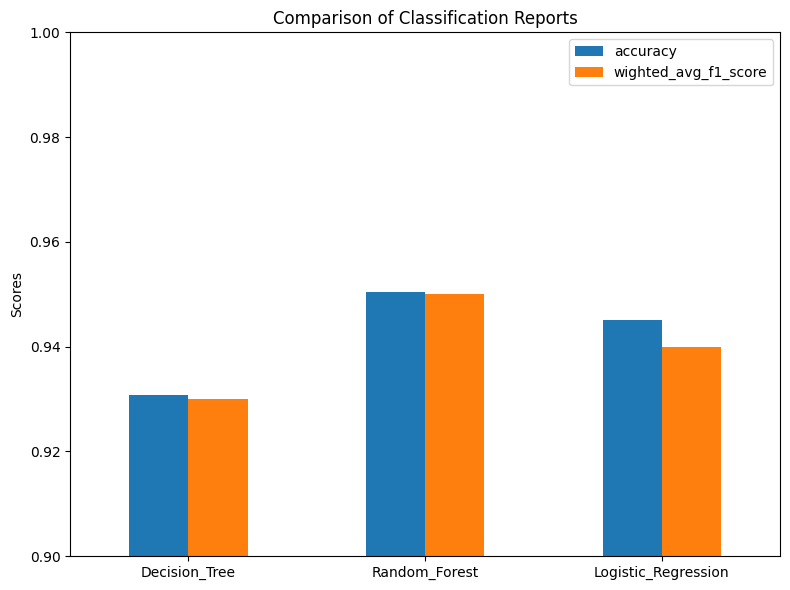

In [ ]:
report1 = {'accuracy':0.93075, 'wighted_avg_f1_score': 0.93}
report2 = {'accuracy': 0.9505, 'wighted_avg_f1_score':  0.95}
report3 = {'accuracy': 0.945, 'wighted_avg_f1_score':0.94}

# Combine the reports into a DataFrame
reports_df = pd.DataFrame([report1, report2, report3], index=['Decision_Tree', 'Random_Forest', 'Logistic_Regression'])

# Plotting the data
reports_df.plot(kind='bar', figsize=(8,6))
plt.title('Comparison of Classification Reports')
plt.ylabel('Scores')
plt.xticks(rotation=0)
plt.ylim(0.9, 1)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

## HYPER PARAMETER TUNING:

> The accuracy is dropping with hyperparameter tuning.

> So, let's stick to our original random_forest.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

rfc_param={'n_estimators':[10,15,20],'min_samples_split':[8,16],'min_samples_leaf':[1,2,3,4,5]}
rfc_grid=GridSearchCV(estimator=rfc,param_grid=rfc_param,scoring='accuracy',cv=10,return_train_score=True)

In [ ]:
rfc_grid_fit=rfc_grid.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
rfc_grid_fit.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 20}

In [ ]:
rfc1=RandomForestClassifier(random_state=1234,min_samples_leaf= 1, min_samples_split= 8, n_estimators=20)

In [ ]:
rfc1.fit(X_train, y_train)

/tmp/ipykernel_33/3980377365.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc1.fit(X_train, y_train)


RandomForestClassifier(min_samples_split=8, n_estimators=20, random_state=1234)

In [ ]:
y_pred4 = rfc1.predict(X_val)

In [ ]:
rfc1.score(X_val,y_val)

0.94675

In [ ]:
0.9505-0.94675

0.003750000000000031

## OBSERVATION :
> The validation accuracy by Hyperparameter tuning went down.

> Let's submit with the original rfc model.

In [ ]:
y_pred.shape

(5000,)

In [ ]:
y_pred = le.inverse_transform(y_pred)

In [ ]:
y_pred.shape

(5000,)

In [ ]:
submission=pd.DataFrame({"ID":np.arange(1,5001),
                        "Crime_Category":y_pred,})
submission.to_csv('submission.csv',index=False)